In [1]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
#Enzo sent me the directly preprocessed file because I don't have enough storage right now
#But you can just run the pipeline otherwise
df = pd.read_csv('../../knnData/BA_US_knn_text.csv')


In [3]:
df.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,user_id,appearance,aroma,palate,taste,overall,rating,text,avg,user_state,beer_state
0,Kupfer Kolsch,289320.0,Copper State Brewing Company,49595.0,Kölsch,4.4,n2185.211743,2.50,4.00,4.00,3.75,3.75,3.76,NaN,3.76,North Carolina,Wisconsin
1,Northwestern Alt,289321.0,Copper State Brewing Company,49595.0,Altbier,4.6,n2185.211743,3.00,3.75,4.00,3.50,3.50,3.58,NaN,3.58,North Carolina,Wisconsin
2,One Cent Wheat,289319.0,Copper State Brewing Company,49595.0,Witbier,5.4,n2185.211743,3.75,3.25,3.75,3.50,3.50,3.48,NaN,3.48,North Carolina,Wisconsin


In [4]:
#features to drop and features to keep for parameter selection
#Dropping user_id assumes that each review is independent of who wrote it
#Disregards the fact that user can write multiple reviews
columns_to_drop = ['user_id','beer_id', 'beer_name', 'brewery_name', 'brewery_id', 'avg', 'user_state', 'beer_state', 'text']

# Drop the specified columns

X = df.drop(columns=columns_to_drop)
y = df['user_state']

# Encode the target variable (user_state)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X.head(3)

,style,abv,appearance,aroma,palate,taste,overall,rating
0,Kölsch,4.4,2.50,4.00,4.00,3.75,3.75,3.76
1,Altbier,4.6,3.00,3.75,4.00,3.50,3.50,3.58
2,Witbier,5.4,3.75,3.25,3.75,3.50,3.50,3.48


In [5]:
#sorting out categorical variables (beer styles) using a frequency encoder
# Calculate frequency of each category in the 'beer_style' column
# since it's categorical and having 150+ beer styles causes high cardinality so we dont one hot encode
frequency_encoding = X['style'].value_counts() / len(df)

# Map each category to its frequency
X['encoded_beer_style'] = X['style'].map(frequency_encoding)
X = X.drop(columns=['style'])
X = X.astype('float32') 
# Now, df['encoded_beer_style'] contains the frequency of each beer style
X.head(3)


,abv,appearance,aroma,palate,taste,overall,rating,encoded_beer_style
0,4.4,2.50,4.00,4.00,3.75,3.75,3.76,0.005233
1,4.6,3.00,3.75,4.00,3.50,3.50,3.58,0.003188
2,5.4,3.75,3.25,3.75,3.50,3.50,3.48,0.014050


              Feature  Importance
0                 abv    0.294771
7  encoded_beer_style    0.242204
6              rating    0.127479
1          appearance    0.088062
2               aroma    0.083075
5             overall    0.060770
3              palate    0.055684
4               taste    0.047954


/var/folders/qf/dk7tzwpd1_j2430sljmhw_c40000gq/T/ipykernel_41409/2653336084.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


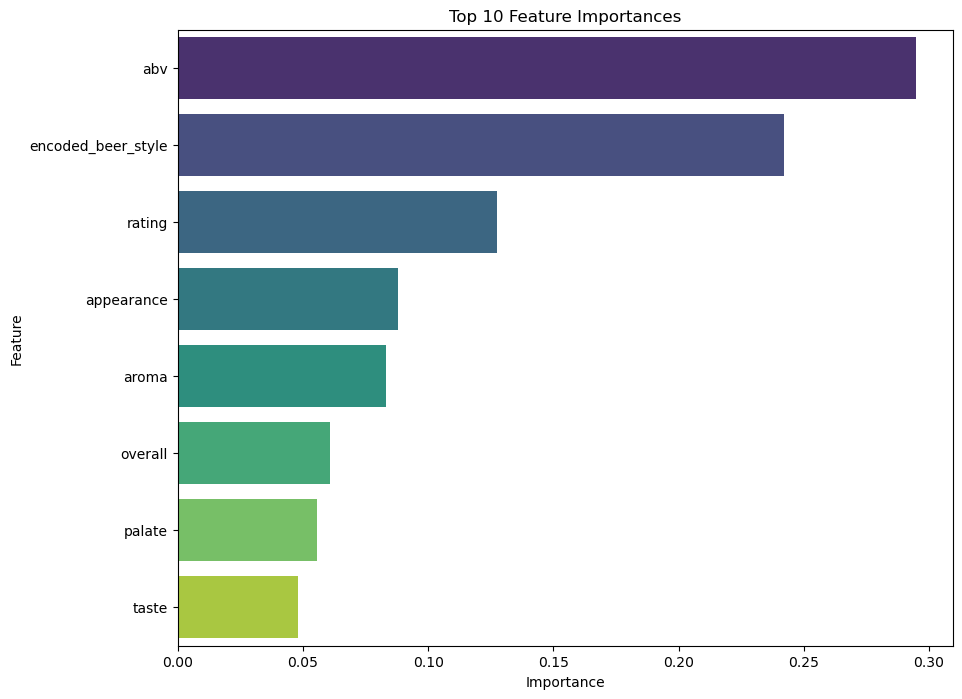

In [6]:

rf = RandomForestClassifier(n_estimators=20, max_depth = 10, random_state=42)
rf.fit(X, y_encoded)


feature_importances = rf.feature_importances_
feature_names = X.columns

#Data frame of feature names and their importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))

# Step 5: Visualize feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [7]:
print(X)

         abv  appearance  aroma  palate  taste  overall  rating  \
0        4.4        2.50   4.00    4.00   3.75     3.75    3.76   
1        4.6        3.00   3.75    4.00   3.50     3.50    3.58   
2        5.4        3.75   3.25    3.75   3.50     3.50    3.48   
3        7.3        3.25   3.75    3.50   4.25     4.25    4.00   
4        7.3        4.00   4.25    3.75   4.00     4.00    4.04   
...      ...         ...    ...     ...    ...      ...     ...   
6331633  6.8        3.50   3.00    3.50   3.00     3.50    3.18   
6331634  5.0        3.50   3.50    3.50   4.00     4.00    3.80   
6331635  5.0        3.00   3.00    3.00   2.50     3.00    2.80   
6331636  5.0        3.00   1.50    1.00   1.50     1.50    1.54   
6331637  5.3        3.00   3.00    3.00   3.00     3.00    3.00   

         encoded_beer_style  
0                  0.005233  
1                  0.003188  
2                  0.014050  
3                  0.008968  
4                  0.008968  
...            

In [8]:
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

abv            146595
appearance    2750548
aroma         2750548
palate        2750548
taste         2750548
overall       2750548
dtype: int64


In [14]:
import numpy as np
np.shape(X)

(6331638, 8)